In [1]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)

In [2]:
import numpy as np
import os

# Set CUDA_LAUNCH_BLOCKING
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

2024-06-20 10:51:04,065 - matplotlib - DEBUG - matplotlib data path: /cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2024-06-20 10:51:04,073 - matplotlib - DEBUG - CONFIGDIR=/cmnfs/home/z.xiao/.config/matplotlib
2024-06-20 10:51:04,076 - matplotlib - DEBUG - interactive is False
2024-06-20 10:51:04,076 - matplotlib - DEBUG - platform is linux
2024-06-20 10:51:04,156 - matplotlib - DEBUG - CACHEDIR=/cmnfs/home/z.xiao/.cache/matplotlib
2024-06-20 10:51:04,164 - matplotlib.font_manager - DEBUG - Using fontManager instance from /cmnfs/home/z.xiao/.cache/matplotlib/fontlist-v330.json


# Load data

In [46]:
import torch

result_dir = "/cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/frame0_1830_ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921_ScanByScan_RTtol0.9_threshold_missabthres0.5_convergence_NoIntercept_pred_mzBinDigits2_imPeakWidth4_deltaMobilityThres80/"
peak_selection_spec_dir = os.path.join(
    "2d_peak_selection", "exp_one_channel_exp_normal_lr05_bce1_out32"
)
peak_selection_dir = os.path.join(result_dir, peak_selection_spec_dir)
cfg_path = [
    os.path.join(peak_selection_dir, "results", f)
    for f in os.listdir(os.path.join(peak_selection_dir, "results"))
    if f.endswith(".yaml")
]
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [47]:
import pandas as pd

test_df = pd.read_csv(
    os.path.join(peak_selection_dir, "calibration", "test_all_df.csv")
)

# Evaluation

<Axes: xlabel='out_score', ylabel='wiou'>

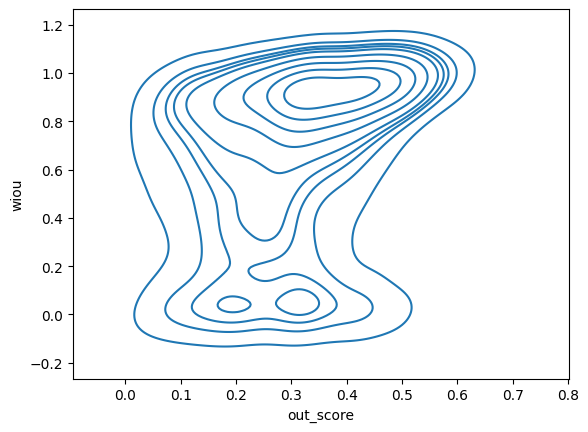

In [48]:
import seaborn as sns

sns.kdeplot(data=test_df, x="out_score", y="wiou")

<Axes: xlabel='out_score', ylabel='wiou'>

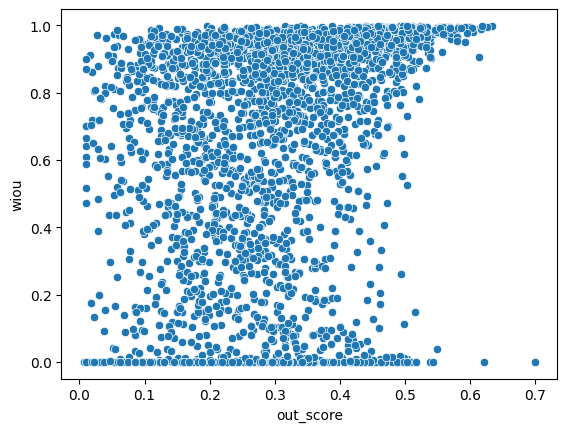

In [49]:
sns.scatterplot(data=test_df, x="out_score", y="wiou")

<Axes: >

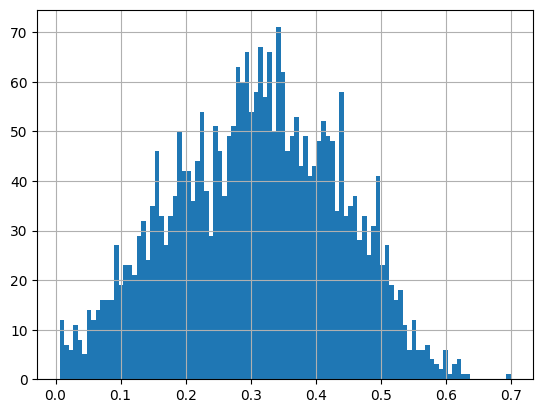

In [50]:
test_df["out_score"].hist(bins=100)

In [51]:
test_df["wiou"].corr(test_df["out_score"])

0.3167343564788412

<Axes: >

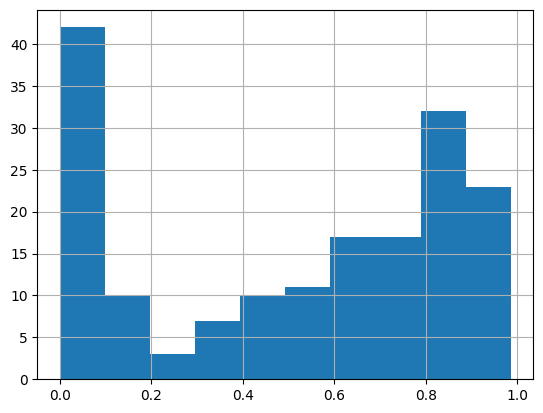

In [53]:
test_df.loc[test_df["out_score"] <= 0.1, "wiou"].hist()

## Correlation of sum_intensitys

2024-06-19 14:22:11,665 - result_analysis.result_analysis - INFO - Reference shape: (31029, 32)
2024-06-19 14:22:11,678 - result_analysis.result_analysis - DEBUG - Reference shape after merging activation sum: (2594, 36)
2024-06-19 14:22:11,679 - result_analysis.result_analysis - DEBUG - sum cols: ['sum_intensity', 'pept_mz_rank', 'out_score', 'wiou']
2024-06-19 14:22:11,681 - result_analysis.result_analysis - DEBUG - Reference non zero shape: (2569, 36)


Data:  Intensity_log sum_intensity_log , slope =  0.848 , intercept =  0.362 , PearsonR =  0.807 , SpearmanR =  0.803


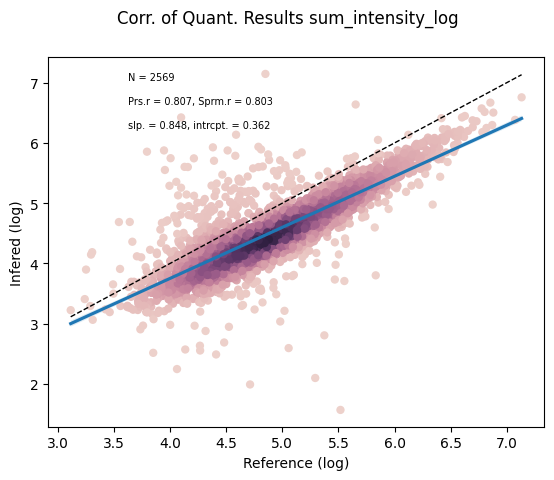

: 

In [126]:
from result_analysis.result_analysis import SBSResult
import pandas as pd

maxquant_merge = pd.read_pickle(
    os.path.join(result_dir, "maxquant_result_merged_cleaned.pkl")
)
sbs_ims_result = SBSResult(
    maxquant_ref_df=maxquant_merge,
    maxquant_merge_df=maxquant_merge,
    maxquant_exp_df=None,
    sum_raw=test_df.loc[test_df["out_score"] >= 0.5],
    # sum_gaussian=train_label_df,
    ims=True,
)
sbs_ims_result.plot_intensity_corr(
    ref_col="Intensity", inf_col="sum_intensity", contour=False
)

<Axes: xlabel='log_label_intensity', ylabel='out_score'>

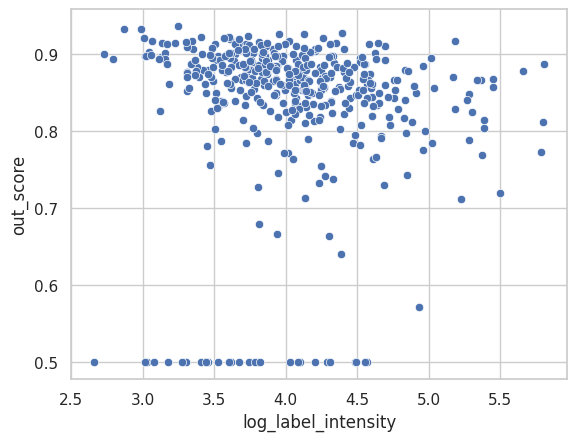

In [ ]:
sns.scatterplot(
    data=test_all_df.loc[test_all_df["losses"] <= 0.1],
    x="log_label_intensity",
    y="out_score",
    # hue="out_score",
    hue_norm=(0.5, 1),
    # color=cm.get_cmap("coolwarm"),
)

2024-06-14 10:37:56,952 - result_analysis.result_analysis - INFO - Reference shape: (31029, 32)
2024-06-14 10:37:56,974 - result_analysis.result_analysis - DEBUG - Reference shape after merging activation sum: (428, 40)
2024-06-14 10:37:56,975 - result_analysis.result_analysis - DEBUG - sum cols: ['sum_intensity_pred', 'pept_mz_rank', 'out_score', 'sum_intensity_label', 'sum_intensity_naive', 'losses', 'ranks', 'delta_log_intensity']
2024-06-14 10:37:56,978 - result_analysis.result_analysis - DEBUG - Reference non zero shape: (399, 40)


Data:  Intensity_log sum_intensity_pred_log , slope =  0.086 , intercept =  4.152 , PearsonR =  0.06 , SpearmanR =  0.112


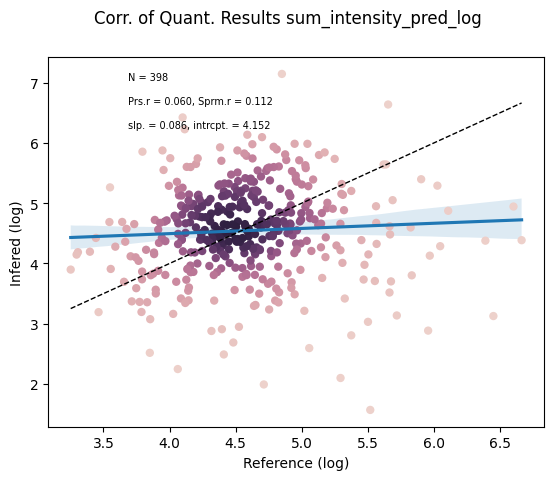

In [57]:
maxquant_merge = pd.read_pickle(
    os.path.join(result_dir, "maxquant_result_merged_cleaned.pkl")
)
sbs_ims_result = SBSResult(
    maxquant_ref_df=maxquant_merge,
    maxquant_merge_df=maxquant_merge,
    maxquant_exp_df=None,
    sum_raw=test_all_df.loc[test_all_df["losses"] <= 0.1],
    # sum_gaussian=train_label_df,    size=3,
    ims=True,
)
sbs_ims_result.plot_intensity_corr(
    ref_col="Intensity", inf_col="sum_intensity_pred", contour=False
)

## Samples with low IoU

<Axes: xlabel='log_label_intensity', ylabel='log_pred_intensity'>

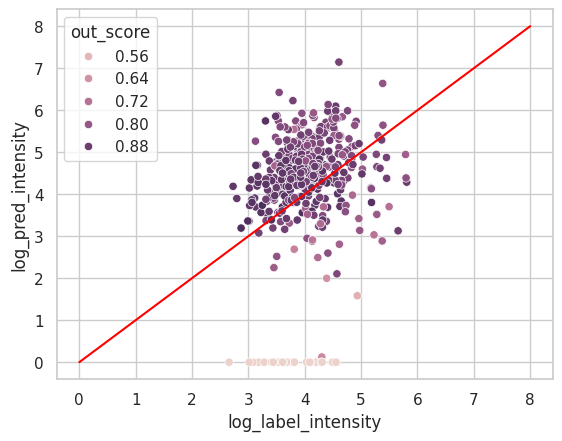

In [82]:
from matplotlib import cm
from pyparsing import col


# set grid in the background
sns.set(style="whitegrid")
sns.scatterplot(
    data=test_all_df.loc[test_all_df["losses"] <= 0.1],
    x="log_label_intensity",
    y="log_pred_intensity",
    hue="out_score",
    hue_norm=(0.5, 1),
    # color=cm.get_cmap("coolwarm"),
)
plt.plot([0, 8], [0, 8], color="red")

<Axes: xlabel='log_pred_intensity', ylabel='out_score'>

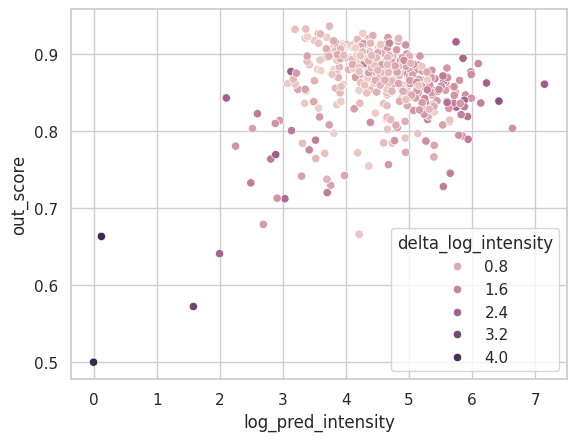

In [91]:
sns.scatterplot(
    data=test_all_df.loc[test_all_df["losses"] <= 0.1],
    x="log_pred_intensity",
    y="out_score",
    hue="delta_log_intensity",
    # hue_norm=(0.5, 1),
    # color=cm.get_cmap("coolwarm"),
)

<Axes: xlabel='losses', ylabel='out_score'>

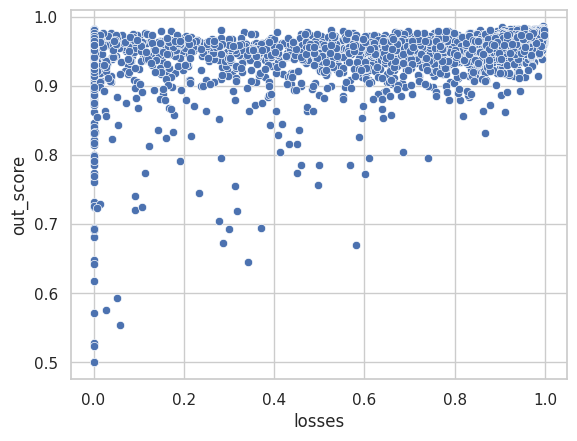

In [111]:
# Evaluating miscalibration
sns.scatterplot(
    # data=test_all_df.loc[test_all_df["losses"] <= 0.1],
    data=test_all_df,
    x="losses",
    y="out_score",
    # hue="delta_log_intensity",
    # hue_norm=(0.5, 1),
    # color=cm.get_cmap("coolwarm"),
)

In [ ]:
sns.scatterplot(
    data=test_all_df.loc[test_all_df["losses"] <= 0.1],
    x="log_label_intensity",
    y="log_pred_intensity",
    size="out_score",
    # color=cm.get_cmap("coolwarm"),
)

In [80]:
from peak_detection_2d.utils import plot_sample_predictions
import pandas as pd

ind_all_wiou = pd.DataFrame(ind_all_wiou)
# get indices of the top 10 worst performing images
worst_performing_images = ind_all_wiou["losses"].sort_values(ascending=True).index[:10]

# Plot sample predictions
plot_sample_predictions(
    test_dataset,
    model=bst_model,
    sample_indices=worst_performing_images,
    # n = 10,
    # save_dir=None,
    metric_list=["mask_wiou", "wdice", "dice"],
    use_hint=False,
    zoom_in=False,
    label="mask",
    device=DEVICE,
    save_dir=os.path.join(peak_selection_dir, "sample_predictions_lowest_wiou"),
)

2024-06-06 16:19:17,937 - peak_detection_2d.seg_model - DEBUG - Layer: CNNBlocks(
  (layers): ModuleList(
    (0): CNNBlock(
      (seq_block): Sequential(
        (0): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): CNNBlock(
      (seq_block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
  )
)
2024-06-06 16:19:17,938 - peak_detection_2d.seg_model - DEBUG - Input x shape: torch.Size([1, 2, 258, 258])
2024-06-06 16:19:17,964 - peak_detection_2d.seg_model - DEBUG - Output shape: torch.Size([1, 32, 258, 258])
2024-06-06 16:19:17,965 - peak_detection_2d.seg_model - DEBUG - Layer: MaxPool2d(kernel_size=2, stride=2, padding

In [82]:
best_performing_images = (
    ind_all_wiou["losses"].sort_values(ascending=False).index[50:60]
)

# Plot sample predictions
plot_sample_predictions(
    test_dataset,
    model=bst_model,
    sample_indices=best_performing_images,
    # n = 10,
    # save_dir=None,
    metric_list=["mask_wiou", "wdice", "dice"],
    use_hint=False,
    zoom_in=False,
    label="mask",
    device=DEVICE,
    save_dir=os.path.join(peak_selection_dir, "sample_predictions_highest_wiou"),
)

2024-06-06 16:21:26,036 - peak_detection_2d.seg_model - DEBUG - Layer: CNNBlocks(
  (layers): ModuleList(
    (0): CNNBlock(
      (seq_block): Sequential(
        (0): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): CNNBlock(
      (seq_block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
  )
)
2024-06-06 16:21:26,037 - peak_detection_2d.seg_model - DEBUG - Input x shape: torch.Size([1, 2, 258, 258])
2024-06-06 16:21:26,038 - peak_detection_2d.seg_model - DEBUG - Output shape: torch.Size([1, 32, 258, 258])
2024-06-06 16:21:26,039 - peak_detection_2d.seg_model - DEBUG - Layer: MaxPool2d(kernel_size=2, stride=2, padding

In [84]:
from peak_detection_2d.utils import plot_per_image_metric_distr

plot_per_image_metric_distr(
    ind_all_wiou["losses"], "Weighted_IoU", save_dir=peak_selection_dir
)
plot_per_image_metric_distr(
    ind_all_wdice["losses"], "Weighted_Dice", save_dir=peak_selection_dir
)

25%: 0.14
50%: 0.78
75%: 0.95
25%: 0.25
50%: 0.88
75%: 0.97


In [ ]:
import gc

torch.cuda.empty_cache()
gc.collect()

31

31

In [20]:
%autoreload 2
from peak_detection_2d.utils import plot_sample_predictions

# Plot sample predictions
plot_sample_predictions(
    test_dataset,
    model=bst_model,
    sample_indices=[1420, 2409, 1483, 2101,  68, 3003, 2973, 2182, 2311, 2606],
    #n = 10,
    #save_dir=None,
    metric_list = ["mask_wiou", "wdice", "dice"],
    use_hint=False,
    zoom_in = False,
    label = 'mask',
    save_dir=os.path.join(peak_selection_dir, "sample_predictions"),
)

2024-06-03 16:25:35,331 - peak_detection_2d.seg_model - DEBUG - Layer: CNNBlocks(
  (layers): ModuleList(
    (0): CNNBlock(
      (seq_block): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): CNNBlock(
      (seq_block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
  )
)
2024-06-03 16:25:35,332 - peak_detection_2d.seg_model - DEBUG - Input x shape: torch.Size([1, 1, 178, 178])
2024-06-03 16:25:35,333 - peak_detection_2d.seg_model - DEBUG - Output shape: torch.Size([1, 32, 178, 178])
2024-06-03 16:25:35,334 - peak_detection_2d.seg_model - DEBUG - Layer: MaxPool2d(kernel_size=2, stride=2, padding